In [329]:
import pandas as pd
import numpy as np

import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [330]:
# obtained by tesseract lib

data = pd.read_csv('final_data.csv')

In [331]:
data.shape

(423, 1)

In [332]:
data.head()

,Text
0,"3 To,Charlie KaufmanVerification Department He..."
1,"6 AnyCompany Inc. DATE [Jun 47, 2019Sui..."
2,"9 THE AIML StORE1234 SOMEWHERE ROPOWAY, CALIFO..."
3,1 Page 1ofS 03/02/2022DC —_ 1090001004290 ais...
4,"9 THE AIML StORE1234 SOMEWHERE ROPOWAY, CALIFO..."


In [333]:
data.tail()

,Text
418,7 Personal Financial StatementNAME BIRTHDAY (M...
419,7 DF The Commonwealth of Massachusetts(1)(2)(3...
420,11 Schedule F (Form 1040) 2020Page 2Farm Incom...
421,7 PERSONAL FINANCIAL STATEMENTSection 1(b) - O...
422,11 Form 1040 (2021) Page 2 ...


In [334]:
data.isnull().sum()

Text    0
dtype: int64

In [335]:
def get_label(text):
    k=''
    for i in text:
        if i==' ':
            return int(k)
        k+=i

In [336]:
data['label'] = data['Text'].apply(lambda x: get_label(x))
data["Text"] = data['Text'].str[1:]

<AxesSubplot:>

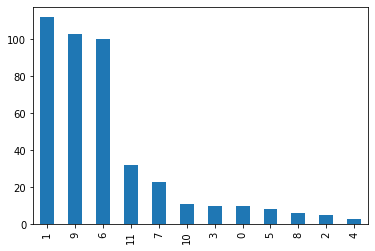

In [337]:
data.label.value_counts().plot(kind='bar')

In [338]:
mapping = {0:'address_proof', 1:"bank_statements",2:"business_proof",3:"employment_proof",4:'fund_raising',5:'identity_proof',6:'invoices',7:'personal_finance_statement',8:'power_of_attorney',9:'receipts',10:'salary_slip',11:'tax_return'}
data['label'].replace(mapping,inplace = True)


data.shape

(423, 2)

In [339]:
data.head()

,Text,label
0,"To,Charlie KaufmanVerification Department Hea...",employment_proof
1,"AnyCompany Inc. DATE [Jun 47, 2019Suit...",invoices
2,"THE AIML StORE1234 SOMEWHERE ROPOWAY, CALIFOR...",receipts
3,Page 1ofS 03/02/2022DC —_ 1090001004290 ais)...,bank_statements
4,"THE AIML StORE1234 SOMEWHERE ROPOWAY, CALIFOR...",receipts


In [340]:
data.tail()

,Text,label
418,Personal Financial StatementNAME BIRTHDAY (MM...,personal_finance_statement
419,DF The Commonwealth of Massachusetts(1)(2)(3)...,personal_finance_statement
420,1 Schedule F (Form 1040) 2020Page 2Farm Income...,tax_return
421,PERSONAL FINANCIAL STATEMENTSection 1(b) - Ot...,personal_finance_statement
422,1 Form 1040 (2021) Page 2 ...,tax_return


In [341]:
mapping = {0:'address_proof', 1:"bank_statements",2:"business_proof",3:"employment_proof",4:'fund_raising',5:'identity_proof',6:'invoices',7:'personal_finance_statement',8:'power_of_attorney',9:'receipts',10:'salary_slip',11:'tax_return'}
data['label'].replace(mapping,inplace = True)

<AxesSubplot:>

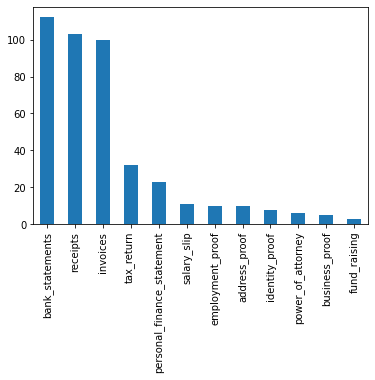

In [342]:
data.label.value_counts().plot(kind='bar')

In [343]:
data.label.value_counts()

bank_statements               112
receipts                      103
invoices                      100
tax_return                     32
personal_finance_statement     23
salary_slip                    11
employment_proof               10
address_proof                  10
identity_proof                  8
power_of_attorney               6
business_proof                  5
fund_raising                    3
Name: label, dtype: int64

In [344]:
data['Text'] = data['Text'].replace(r'[^A-Za-z0-9 ]+', '')
data['Text'] = data['Text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

# replacing the punctuations and the other sindle lettered words
# 

In [345]:
vectorizer = CountVectorizer(stop_words='english') 

# for counting the frequencies of words

In [346]:
x = data['Text']
y = data['label']

In [347]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 88)


#

In [348]:
x_vec = vectorizer.fit_transform(x)
x_vec

<423x12289 sparse matrix of type '<class 'numpy.int64'>'
	with 38497 stored elements in Compressed Sparse Row format>

In [349]:
model = MultinomialNB()

In [350]:
model.fit(x_vec,y)

MultinomialNB()

In [351]:
y_pred = model.predict(vectorizer.transform(x))
y_pred

array(['employment_proof', 'invoices', 'receipts', 'bank_statements',
       'receipts', 'bank_statements', 'address_proof', 'bank_statements',
       'receipts', 'receipts', 'invoices', 'receipts', 'business_proof',
       'receipts', 'receipts', 'receipts', 'bank_statements',
       'bank_statements', 'power_of_attorney', 'bank_statements',
       'receipts', 'invoices', 'receipts', 'receipts', 'invoices',
       'receipts', 'tax_return', 'receipts', 'employment_proof',
       'bank_statements', 'bank_statements', 'salary_slip',
       'bank_statements', 'receipts', 'address_proof', 'salary_slip',
       'invoices', 'receipts', 'bank_statements', 'receipts', 'invoices',
       'invoices', 'receipts', 'bank_statements', 'identity_proof',
       'power_of_attorney', 'bank_statements', 'tax_return', 'receipts',
       'bank_statements', 'bank_statements', 'bank_statements',
       'receipts', 'bank_statements', 'invoices', 'invoices', 'invoices',
       'salary_slip', 'invoices', 'recei

In [352]:
print(accuracy_score(y,y_pred))

0.9787234042553191


In [353]:
te = pd.read_csv('test.csv')
te

,Text
0,"Company Name or LetterheadAddressCity, State, ..."


In [354]:
te.isnull().sum()

Text    0
dtype: int64

In [355]:
test = te['Text']
test

0    Company Name or LetterheadAddressCity, State, ...
Name: Text, dtype: object

In [356]:
test_vec = vectorizer.transform(test)
test_vec

<1x12289 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [357]:
model.predict(vectorizer.transform(test))

array(['tax_return'], dtype='<U26')